## Figure 2

In [1]:
addpath('src')

In [2]:
%%file src/P_resp_over_time.m

function [Pdeg,Pcon] = P_resp_over_time(filename)

load(filename,'trialStarts','LeftPressesBlock','RightPressesBlock');

Fdeg = zeros(150,6);
Fcon = zeros(150,6);

for b = 1:6
    if b ==1||b==4||b==5
        degPresses = LeftPressesBlock{b};
        conPresses = RightPressesBlock{b};
    else
        degPresses = RightPressesBlock{b};
        conPresses = LeftPressesBlock{b};        
    end
    
    degPresses = degPresses - trialStarts(b);
    degPresses = unique(fix(degPresses));
    degPresses(degPresses == 0) = 1;
    Fdeg(degPresses,b) = 1;

    conPresses = conPresses - trialStarts(b);
    conPresses = unique(fix(conPresses));
    conPresses(conPresses == 0) = 1;
    Fcon(conPresses,b) = 1; 
    
end

Fdeg = Fdeg(1:120,:);
Fcon = Fcon(1:120,:);

Pdeg = sum(Fdeg,2)/6;
Pcon = sum(Fcon,2)/6;

end

Created file '/Users/rich/Projects/Causal learning/Algorithmic-Neuroanatomy/src/P_resp_over_time.m'.


In [3]:
%%file src/get_means.m

function [means] = get_means(filenames)
degraded = zeros(length(filenames),1); 
conting = zeros(length(filenames),1);

for i = 1:size(filenames,1)
    fullfilename = fullfile('data', filenames(i).name);
    [Pdeg,Pcon] = probability_resp(fullfilename);
    degraded(i) = Pdeg;
    conting(i) = Pcon;
end

means = [mean(conting), mean(degraded)];

end

Created file '/Users/rich/Projects/Causal learning/Algorithmic-Neuroanatomy/src/get_means.m'.


In [4]:
%%file src/probability_resp.m

function [Pdeg,Pcon] = probability_resp(filename)

load(filename,'trialStarts','LeftPressesBlock','RightPressesBlock');

Fdeg = zeros(150,6);
Fcon = zeros(150,6);

for b = 1:6
    if b ==1||b==4||b==5
        degPresses = LeftPressesBlock{b};
        conPresses = RightPressesBlock{b};
    else
        degPresses = RightPressesBlock{b};
        conPresses = LeftPressesBlock{b};        
    end
    
    degPresses = degPresses - trialStarts(b);
    degPresses = unique(fix(degPresses));
    degPresses(degPresses == 0) = 1;
    Fdeg(degPresses, b) = 1;

    conPresses = conPresses - trialStarts(b);
    conPresses = unique(fix(conPresses));
    conPresses(conPresses == 0) = 1;
    Fcon(conPresses, b) = 1; 
    
end

Fdeg = Fdeg(1:120,:);
Fcon = Fcon(1:120,:);

if contains(filename, 'deg')
    denominator = 65; % Average time per block in this condition
else
    denominator = 50; % Average time per block in this condition
end

Pdeg = mean(sum(Fdeg) / denominator);
Pcon = mean(sum(Fcon) / denominator);

end

Created file '/Users/rich/Projects/Causal learning/Algorithmic-Neuroanatomy/src/probability_resp.m'.


In [5]:
%%file src/get_ratings.m

function [means] = get_ratings(filenames)

means = zeros(length(filenames), 2);

for i = 1:length(filenames)
    fullfilename = fullfile('data', filenames(i).name);
    load(fullfilename, 'ratings');
 
    rt = zeros(6,2);  
    % non-degraded        % degraded
    rt(1,1) = ratings(1,2); rt(1,2) = ratings(1,1);
    rt(2,1) = ratings(2,1); rt(2,2) = ratings(2,2);
    rt(3,1) = ratings(3,1); rt(3,2) = ratings(3,2);
    rt(4,1) = ratings(4,2); rt(4,2) = ratings(4,1);
    rt(5,1) = ratings(5,2); rt(5,2) = ratings(5,1);
    rt(6,1) = ratings(6,1); rt(6,2) = ratings(6,2);
    means(i, :) = mean(rt);
    
end

end

Created file '/Users/rich/Projects/Causal learning/Algorithmic-Neuroanatomy/src/get_ratings.m'.


In [6]:
degfiles  = dir ('data/*deg_preprocessed*');
sigfiles = dir ('data/*sig_preprocessed*');

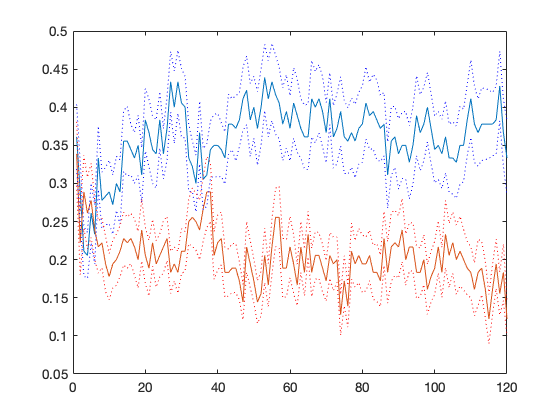

In [7]:
degraded = zeros(120,0); conting = zeros(120,0);

for i = 1:length(degfiles)
    filename = fullfile('data', degfiles(i).name);
    [Pdeg,Pcon] = P_resp_over_time(filename);
    degraded(:,end+1) = Pdeg;
    conting(:,end+1) = Pcon;
end

plot(mean(conting,2)); hold on; plot(mean(degraded,2)); 
uppcon = mean(conting,2) + std(conting,1,2)/sqrt(30);
lowcon = mean(conting,2) - std(conting,1,2)/sqrt(30);
uppdeg = mean(degraded,2) + std(degraded,1,2)/sqrt(30);
lowdeg = mean(degraded,2) - std(degraded,1,2)/sqrt(30);
plot(uppcon,':b'); plot(lowcon,':b');
plot(uppdeg,':r'); plot(lowdeg,':r');
hold off

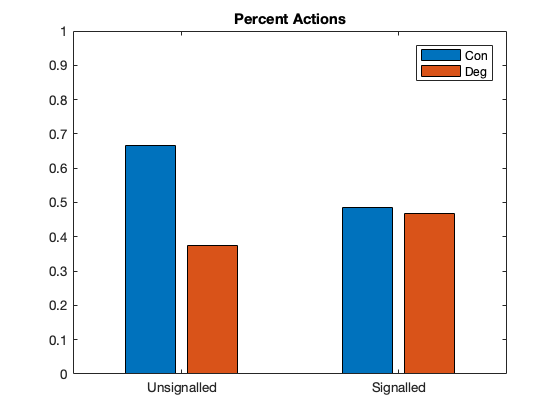

In [8]:
deg_means = get_means(degfiles);
sig_means = get_means(sigfiles);

X = categorical({'Unsignalled','Signalled'});
X = reordercats(X,{'Unsignalled','Signalled'}); 
vals = [deg_means; sig_means];
bar(X, vals); 
ylim([0, 1])
title('Percent Actions')
legend('Con', 'Deg')

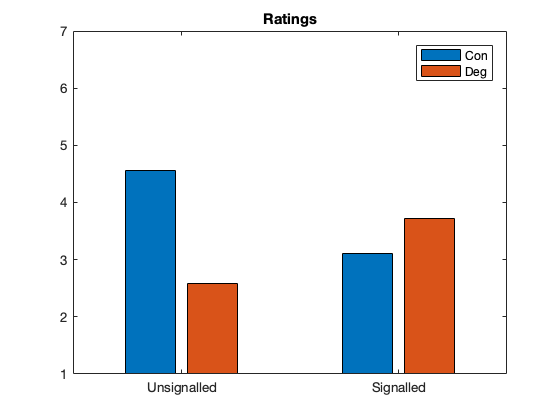

In [9]:
deg_ratings = get_ratings(degfiles);
sig_ratings = get_ratings(sigfiles);

X = categorical({'Unsignalled','Signalled'});
X = reordercats(X,{'Unsignalled','Signalled'}); 
vals = [mean(deg_ratings); flip(mean(sig_ratings))];
bar(X, vals); 
ylim([1, 7])
title('Ratings')
legend('Con', 'Deg')